# SAMPLE CODE FOR `*_util.py` FUNCTIONS

Most of the code blocks are individual test functions

### Visualizing point cloud images

In [ ]:
import open3d as o3d

# Test to visualize one pcd, (here the pcd used is of the simulated gazebo environment)
pcd_file_path = '/home/ll4ma/cluttered_pcds/64005.305000000.pcd'
temp_pcd = o3d.io.read_point_cloud(pcd_file_path)
temp_pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([temp_pcd])

### Make dictionary of scenes from given dataset

In [ ]:
# Test for get_dict_of_scenes
from data_util import DataLoaderOCID
work_dir_path = '/home/ll4ma/Downloads/ResearchStuff/uois_implementation/uois-new2'
dataset_path = '/OCID-dataset/YCB10/table/bottom/mixed/seq22'
cur_path = work_dir_path + '/datasets' + dataset_path
dataloader_obj = DataLoaderOCID()
dict_of_scenes = dataloader_obj.get_dict_of_scenes(cur_path)
print(len(dict_of_scenes)) # This should be equal to 5

## Quick Segmentation

### Get segmented point cloud of objects from a cluttered scene image(.pcd format)

Let's use 1 GPUs for DSN!
Loaded DSNWrapper model
Let's use 1 GPUs for RRN!
Loaded RRNWrapper model
Number of images: 1


/home/ll4ma/anaconda3/envs/uois-recon/lib/python3.7/site-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/conda/conda-bld/pytorch_1591914880026/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
/home/ll4ma/anaconda3/envs/uois-recon/lib/python3.7/site-packages/torch/nn/functional.py:3104: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")
/home/ll4ma/anaconda3/envs/uois-rec

Total time taken for Segmentation: 0.0 seconds
fg_masks.shape =  torch.Size([1, 480, 640])
seg_masks.shape =  torch.Size([1, 480, 640])
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]


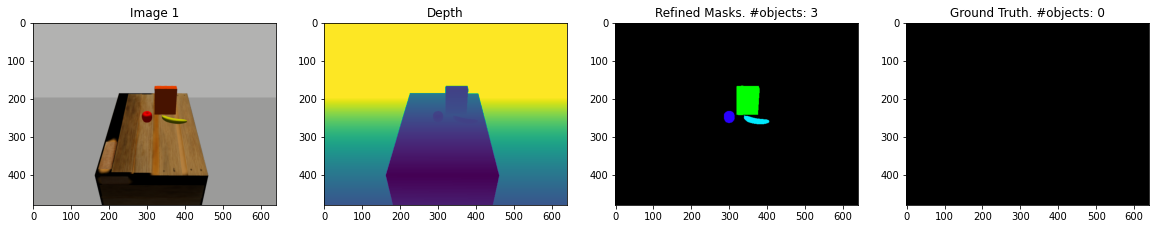

In [1]:
# test code to segment objects in one image by using the helper functions
import open3d as o3d
from segmentation_util import get_segmented_pcds_from_image

input_cluttered_pcd_path = '/home/ll4ma/cluttered_pcds/64005.305000000.pcd'
training_weights_checkpoint_dir = './checkpoints/models_3d/'
temp_seg_pcds = get_segmented_pcds_from_image(input_cluttered_pcd_path, training_weights_checkpoint_dir)
for j in range(len(temp_seg_pcds)):
    o3d.visualization.draw_geometries([temp_seg_pcds[j]])

## Segmentation on a dataset with more hyperparameters

### Get segmented masks from rgbd image

Let's use 1 GPUs for DSN!
Loaded DSNWrapper model
Let's use 1 GPUs for RRN!
Loaded RRNWrapper model
Number of images: 5
Total time taken for Segmentation: 0.0 seconds
fg_masks.shape =  torch.Size([5, 480, 640])
seg_masks.shape =  torch.Size([5, 480, 640])


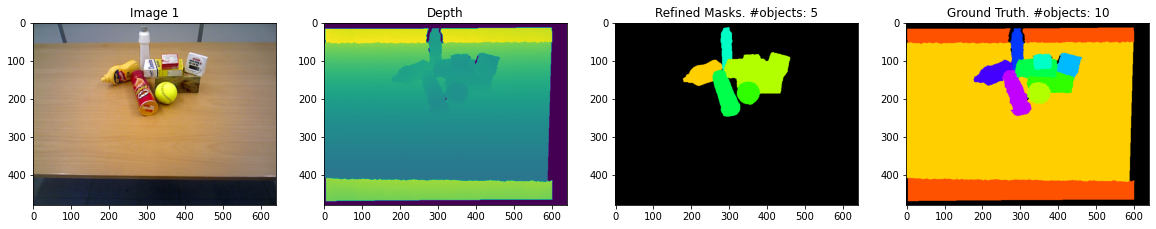

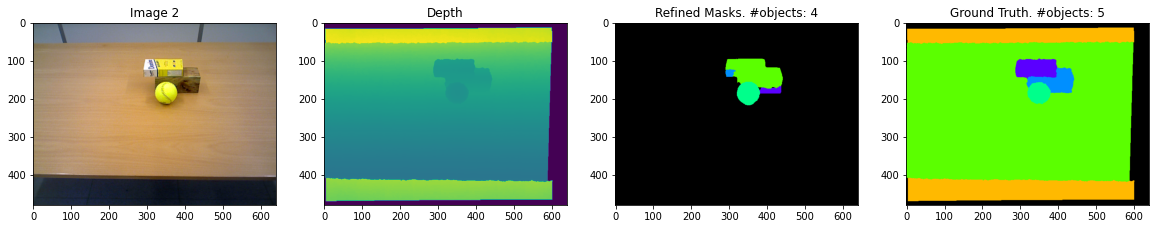

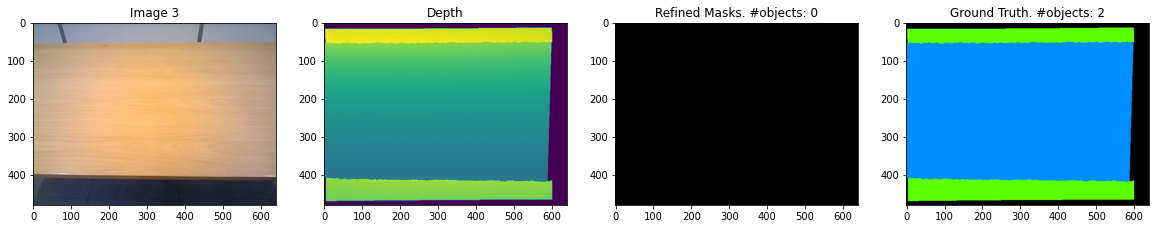

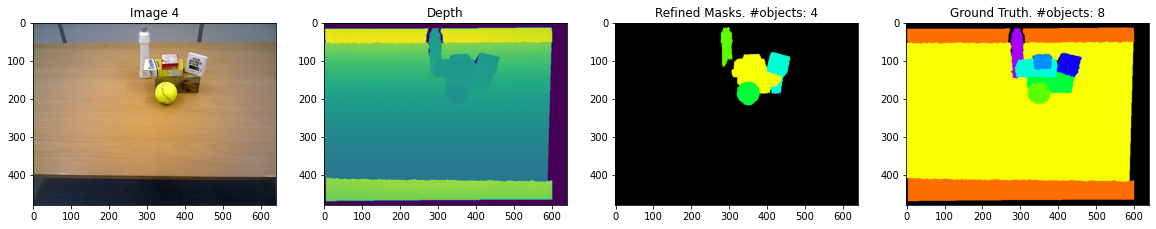

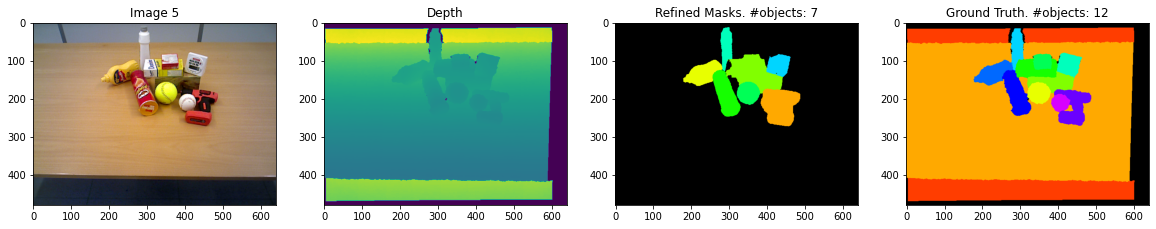

In [3]:
# Test for get_segmented_masks_from_rgbd() and visualize_predicted_and_true_segment_masks()
from segmentation_util import get_segmented_masks_from_rgbd, visualize_predicted_and_true_segment_masks
from data_util import DataLoaderOCID

work_dir_path = '/home/ll4ma/Downloads/ResearchStuff/uois_implementation/uois-new2'
dataset_path = '/OCID-dataset/YCB10/table/bottom/mixed/seq22'
cur_path = work_dir_path + '/datasets' + dataset_path
dataloader_obj = DataLoaderOCID()
dict_of_scenes = dataloader_obj.get_dict_of_scenes(cur_path)

training_weights_checkpoint_dir = './checkpoints/models_3d/'
dsn_config = {

# Sizes
'feature_dim' : 64, # 32 would be normal

# Mean Shift parameters (for 3D voting)
'max_GMS_iters' : 10, 
'epsilon' : 0.01, # Connected Components parameter
'sigma' : 0.02, # Gaussian bandwidth parameter
'num_seeds' : 200, # Used for MeanShift, but not BlurringMeanShift
'subsample_factor' : 5,

# Misc
'min_pixels_thresh' : 250,
'tau' : 100,

}
rgb_imgs, xyz_imgs, seg_masks, label_imgs, fg_masks, file_names = get_segmented_masks_from_rgbd(dict_of_scenes, training_weights_checkpoint_dir, dsn_config)
visualize_predicted_and_true_segment_masks(rgb_imgs, xyz_imgs, seg_masks, label_imgs)

### Get segmented point clouds for the dataset

In [4]:
# test for get_segmented_point_clouds
# Just a sample code where the 4th object in the given images is visualized as point cloud
from segmentation_util import get_segmented_point_clouds
import os
import open3d as o3d

#dir_path = '/home/ll4ma/Downloads/ResearchStuff/uois_implementation/OCID-dataset/ARID10/table/top/mixed/seq14'
work_dir_path = '/home/ll4ma/Downloads/ResearchStuff/uois_implementation/uois-new2'
dataset_path = '/OCID-dataset/YCB10/table/bottom/mixed/seq22'
cur_path = work_dir_path + '/datasets' + dataset_path

cur_pcd_out_dir = work_dir_path + '/pcd_outputs' + dataset_path
N = rgb_imgs.shape[0]

for i in range(N):
    file_name_without_path = file_names[i][len(cur_path)+1:]
    cur_image_pcd_out_dir = cur_pcd_out_dir + '/' + file_name_without_path
    segmented_pcds = get_segmented_point_clouds(seg_masks[i,...], dict_of_scenes[file_names[i]]['depth'])
#     print(cur_image_pcd_out_dir)
#     o3d.visualization.draw_geometries([segmented_pcds[1]])
    os.makedirs(cur_image_pcd_out_dir, exist_ok=True)
    for j in range(len(segmented_pcds)):
        cur_pcd_path = cur_image_pcd_out_dir + '/' + 'obj' + str(j) + '.pcd'
        o3d.io.write_point_cloud(cur_pcd_path,segmented_pcds[j])
        if i == 4:
            o3d.visualization.draw_geometries([segmented_pcds[j]])

[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to [0, 1]
[Open3D WARNING] invalid color in PaintUniformColor, clipping to

### Visualize the real segmentation

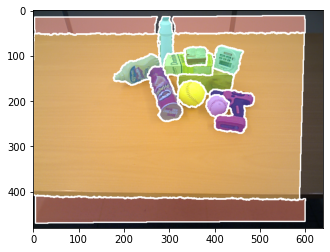

In [5]:
import numpy as np
import dependencies.uois3d.src.util.utilities as util_
import matplotlib.pyplot as plt

# visualizes real segmentation
num_objs = np.unique(seg_masks[4]).max()+1
temp = util_.visualize_segmentation(rgb_imgs[4].astype(np.uint8), label_imgs[4], num_objs+5)
plt.imshow(temp)

### Visualize the predicted segmentation

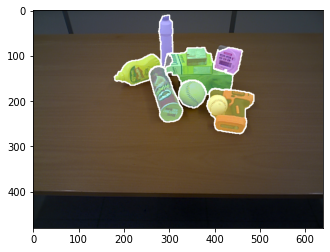

In [6]:
# visualizes predicted segmentation
num_objs = np.unique(seg_masks[4]).max()+1
temp = util_.visualize_segmentation(rgb_imgs[4].astype(np.uint8), seg_masks[4], num_objs)
plt.imshow(temp)

### RANSAC Table (Deprecated because fg_masks (output of segmentation) can be used to  plot the table directly)

In [ ]:
# test for get_table_from_ransac
# from segmentation_util import get_table_from_ransac
# import numpy as np
# import dependencies.uois3d.src.util.utilities as util_
# import matplotlib.pyplot as plt

# plane_masks, distance_from_table = get_table_from_ransac(fg_masks, xyz_imgs)
# num_objs = np.unique(seg_masks[4]).max()+1
# temp = util_.visualize_segmentation(rgb_imgs[4].astype(np.uint8), plane_masks[4], num_objs)
# plt.imshow(temp)

### Segmentation metrics of a dataset

In [7]:
# test for print_segmentation_metrics_for_directory
big_dir = '/home/ll4ma/Downloads/ResearchStuff/uois_implementation/uois-new2/datasets/OCID-dataset/**/seq14/'
work_dir_path = '/home/ll4ma/Downloads/ResearchStuff/uois_implementation/uois-new2'
dataset_path = '/OCID-dataset/YCB10/table/bottom/mixed/seq22'
cur_path = work_dir_path + '/datasets' + dataset_path
training_weights_checkpoint_dir = './checkpoints/models_3d/'

from IPython.utils import io
from segmentation_util import get_segmentation_metrics_for_dataset

# output is suppressed but it takes about 4 mins to run for OCID dataset
with io.capture_output() as captured:
    av_eval_metrics, num_images = get_segmentation_metrics_for_dataset(big_dir,training_weights_checkpoint_dir)
    
for key, val in av_eval_metrics.items():
    print('Average' + key + ' = ', val*100/num_images)


AverageObjects F-measure =  23.27233567606407
AverageObjects Precision =  95.23068961392026
AverageObjects Recall =  13.619931044893809
AverageBoundary F-measure =  47.97424691738823
AverageBoundary Precision =  92.39154812429757
AverageBoundary Recall =  33.87815925167919
